In [11]:
#!pip install tensorflow

In [12]:
import tensorflow as tf
from tensorflow import keras # frame work for tensorflow

import numpy as np
import matplotlib.pyplot as plt

In [13]:
mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [14]:
train_images,test_images = train_images/255.0,test_images/255.0  # image contain 8 bit concept so 2^8=255

In [15]:
train_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
model=keras.Sequential([
    keras.layers.Reshape((28,28,1),input_shape=(28,28)),   # (28,28,1) mens 1 image at a time
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),  ---> batch normalization
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
    ])

In [17]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])#
model.fit(train_images,train_labels,epochs=3)
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2) # verbose -->set of rule
print(f'\nTest accuracy:{test_acc * 100:.2f}%')

Epoch 1/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1507 - accuracy: 0.9545
Epoch 2/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0531 - accuracy: 0.9835
Epoch 3/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0380 - accuracy: 0.9883
313/313 - 1s - loss: 0.0323 - accuracy: 0.9894 - 1s/epoch - 4ms/step

Test accuracy:98.94%


In [18]:
#devnagri,stack overflow, digit classification paper 

In [19]:
predictions=model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [38]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img= predictions_array,true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel(f'predicted:{predicted_label} ({100*np.max(predictions_array):.2f}%)',color=color)

In [39]:
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label= predictions_array,true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

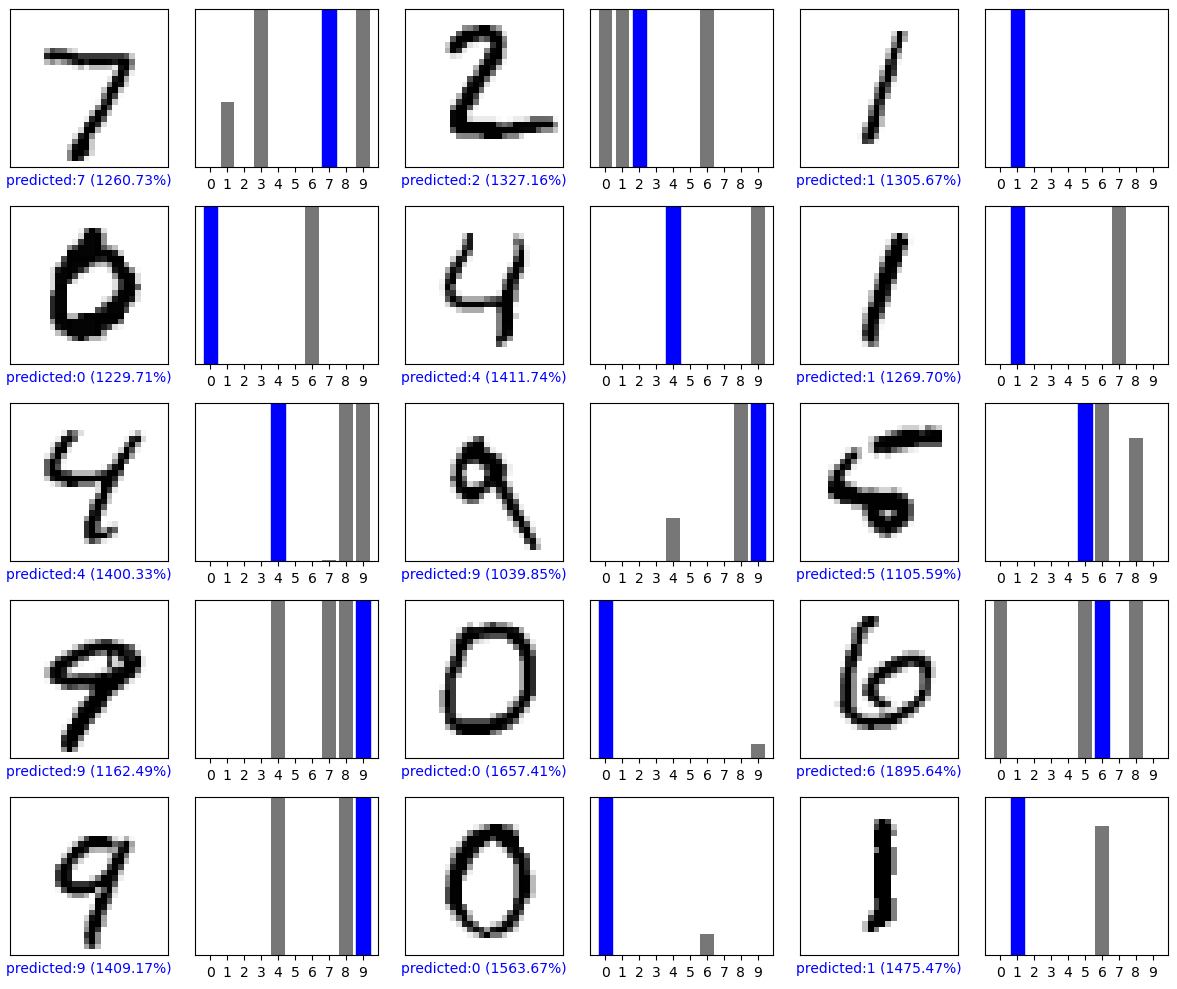

In [40]:
num_rows = 5
num_cols = 3 
num_images = num_rows* num_cols 
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix
predictions1=np.argmax(model.predict(test_images), axis=-1)

313/313 [==============================] - 1s 4ms/step


In [46]:
confusion = confusion_matrix(test_labels, predictions1)
print(confusion)

[[ 975    0    1    0    0    0    3    1    0    0]
 [   0 1130    0    1    0    1    3    0    0    0]
 [   2    0 1022    0    1    0    2    5    0    0]
 [   0    0    0 1003    0    5    0    1    1    0]
 [   0    0    0    0  975    0    6    0    0    1]
 [   1    0    1    4    0  883    1    1    0    1]
 [   0    2    0    0    1    1  954    0    0    0]
 [   0    3    1    1    1    0    0 1021    1    0]
 [   4    0    3    4    0    2    2    1  957    1]
 [   2    1    0    2    4   13    2    7    4  974]]
